In [1]:
import os
from pprint import pprint
from six import BytesIO

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image, ImageColor, ImageDraw, ImageFont, ImageOps
from tqdm import tqdm
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

detector = hub.load("https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1") 
# The input tensor is a tf.uint8 tensor with shape [1, height, width, 3] with values in [0, 255].

def load_img_new(path_to_img):
  img = tf.io.read_file(path_to_img) # kết nối với link path_to_img
  img = tf.image.decode_image(img, channels=3) # đọc ảnh với chiều = 3
  img = img[tf.newaxis, :] #cho img vào trong  chiều để tăng chiều dữ liệu
  # new_img = tf.cast(img, tf.uint8)
  return img # new_img
content_path = tf.keras.utils.get_file('emiu-xinh-dep.jpg', 'https://i.ibb.co/N9JYdvR/emiu-xinh-dep.jpg')

image_tensor  = load_img_new(content_path)
detector_output = detector(image_tensor)
class_ids = detector_output["detection_classes"]

In [2]:
url = "https://raw.githubusercontent.com/amikelive/coco-labels/master/coco-labels-paper.txt"
df = pd.read_csv(url, sep="\n", header=None, names=["labels"])
df.index = range(1,len(df)+1)
df.labels[1] = "Lan Anh Xinh Gai"
print(df)


              labels
1   Lan Anh Xinh Gai
2            bicycle
3                car
4         motorcycle
5           airplane
..               ...
87          scissors
88        teddy bear
89        hair drier
90        toothbrush
91        hair brush

[91 rows x 1 columns]


In [3]:
box_class = detector_output['detection_classes'][detector_output['detection_scores']>0.5]
box_class

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>

In [4]:
box_pos = detector_output['detection_boxes'][detector_output['detection_scores']>0.5]
box_pos

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0., 0., 1., 1.]], dtype=float32)>

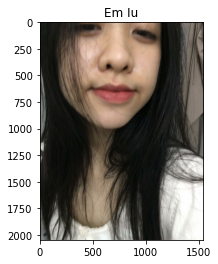

In [5]:
plt.imshow(image_tensor[0])
plt.title("Em Iu")
plt.show()

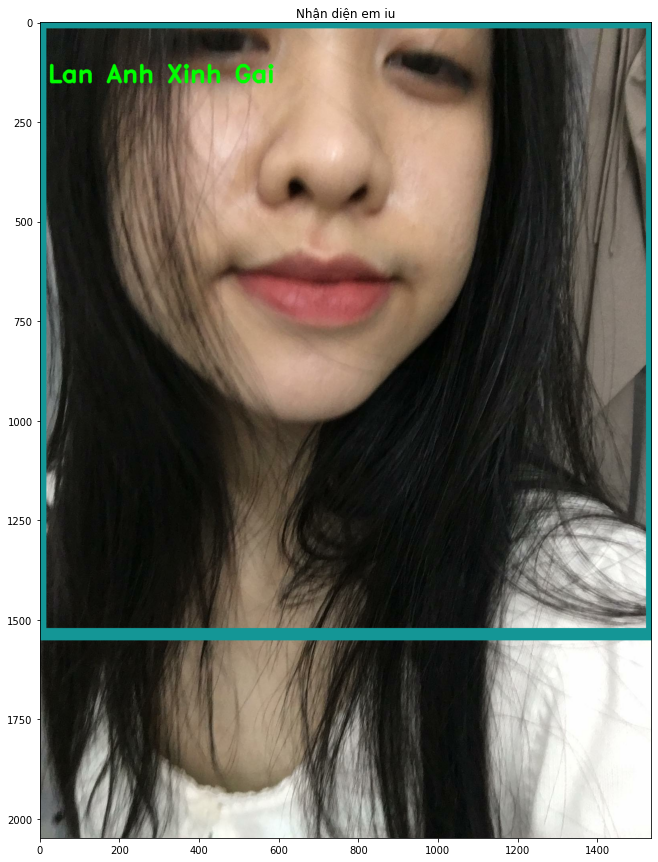

In [6]:
import cv2
img = image_tensor[0].numpy()
color = [(0,255,0),(0,0,255)]
plt.figure(figsize = (18,15))
for i,bbox in enumerate(box_pos):
    cv2.rectangle(img,(int(bbox[0]*img.shape[0]), int(bbox[1]*img.shape[0])), 
                      (int(bbox[2]*img.shape[1]), int(bbox[3]*img.shape[1])), (i+20,i+150,i+150),30)
    cv2.putText(img,text = df.labels[int(box_class[i].numpy())],
                org = (int(bbox[0]*img.shape[0])+20, int(bbox[1]*img.shape[0])+ 150),
                fontFace = cv2.FONT_HERSHEY_DUPLEX,fontScale = 2, color = color[i], thickness =5 )
plt.imshow(img)
plt.title("Nhận diện em iu")
plt.show()